# Lab: Simulate Dice Throws with NumPy 🎲🤖

Welcome! This lab shows how you can use Numpy to simulate rolling dice from rolling a single die up to summing the results from multiple rolls. You will also see how to handle situations in which one of the sides of the dice is loaded (it has a greater probability of landing on that side comparing to the rest).

Let's get started! 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Represent a dice

The first thing you will need is to define how many sides your dice will have. You can even go a step further and represent a dice by using a NumPy array and assigning to each side a label which will be equal to the number of that side:

In [2]:
# Define the desired number of sides (try changing this value!)
n_sides = 6

# Represent a dice by using a numpy array
dice = np.array([i for i in range(1, n_sides+1)])

dice

array([1, 2, 3, 4, 5, 6])

## Roll the dice

With your dice ready it is time to roll it. For now you will assume that the dice is fair, which means the probability of landing on each side is the same (it follows a uniform distribution). To achieve this behaviour you can use the function [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html), which given a NumPy array returns one of the entries in it randomnly:

In [3]:
# Run this cell multiple times (every time you should get a different result at random)
np.random.choice(dice)

np.int64(4)

This is great but if you wanted to roll the dice 20 times you will need to run the cell 20 times and record each result. Now you need a way to simulate several rolls at the same time. For this you can define the number of rolls you desire and use a list comprehension to roll the dice as many times as you like, you can also save every roll in a NumPy array:

In [4]:
# Roll the dice 20 times
n_rolls = 20

# Save the result of each roll
rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

rolls

array([4, 2, 2, 4, 6, 4, 5, 5, 1, 5, 5, 3, 2, 2, 4, 6, 4, 3, 3, 3])

Now you have a convenient way of keeping track of the result of each roll, nice!

What is you would like to know the mean and variance of this process. For this you can use NumPy's functions [np.mean](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [np.var](https://numpy.org/doc/stable/reference/generated/numpy.var.html):

In [5]:
# Compute mean of 20 rolls
m = np.mean(rolls)

# Compute variance of 20 rolls
v = np.var(rolls)

print(f"mean of rolls: {m:.2f}\nvariance of rolls: {v:.2f}")

mean of rolls: 3.65
variance of rolls: 1.93


You can even check the distribution of the rolls by plotting a histogram of the NumPy array that holds the result of each throw. For this you will use the plotting library Seaborn, concretely the [sns.histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) function:

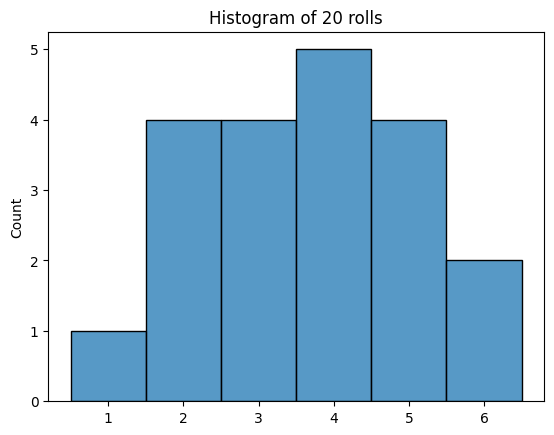

In [6]:
# Display histogram of 20 rolls
n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

You probably didn't get a distribution that looks uniform (since the results are random). This happened because you are only simulating 20 rolls so far. Now try doing the same but for 20000 rolls:

mean of rolls: 3.49
variance of rolls: 2.94


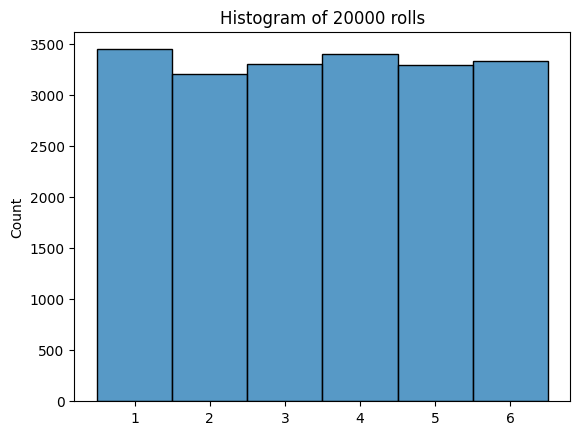

In [7]:
n_rolls = 20_000

rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

print(f"mean of rolls: {np.mean(rolls):.2f}\nvariance of rolls: {np.var(rolls):.2f}")

n_rolls_hist = sns.histplot(rolls, discrete=True)
n_rolls_hist.set(title=f"Histogram of {n_rolls} rolls")
plt.show()

Does this plot and the metrics of mean and variance align with what you have learned about the uniform distribution during the course?

Simulations are a great way of contrasting results against analytical solutions. For example, in this case the theoretical mean and variance are 3.5 and 2.916 respectively (you can check the formulas to get this results [here](https://en.wikipedia.org/wiki/Discrete_uniform_distribution)). The important thing to keep in mind is that the more simulations you perform the closer your results will be to the analytical values so always choose an appropriate number of simulations! 

NumPy is quite fast so performing 20 thousand runs is done fairly quick.

## Summing the result of rolling twice

Now you want to throw the dice twice and record the sum of the two rolls. For this you can do as before and save all results of the first roll in a NumPy array but this time you will have a second array that saves the results for the second rolls. 

To get the sum you can simply sum the two arrays. This is possible because NumPy allows for vectorized operations such as this one. When you sum two NumPy arrays you will get a new array that includes the element-wise sum of the elements in the arrays you summed up.

Notice that now you can compute the the mean and variance for the first rolls, the second rolls and the sum of rolls. You can also compute the covariance between the first and second rolls:

mean of first_rolls: 3.53
variance of first_rolls: 2.91

mean of second_rolls: 3.50
variance of second_rolls: 2.94

mean of sum_of_rolls: 7.03
variance of sum_of_rolls: 5.86

covariance between first and second roll:
[[2.91325464 0.00671451]
 [0.00671451 2.93634219]]


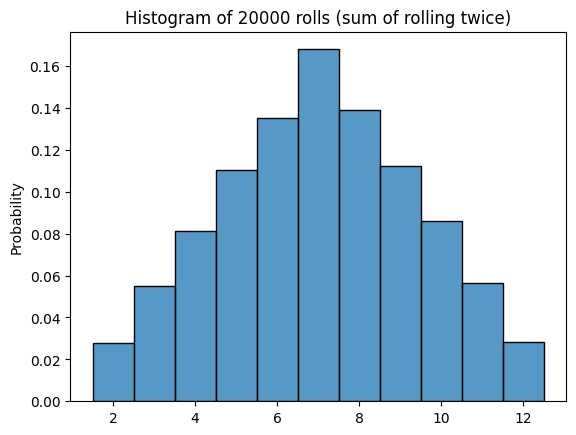

In [8]:
n_rolls = 20_000

# First roll (same as before)
first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Second roll (code is the same but saved in a new numpy array)
second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Sum both rolls (this is easy since numpy allows vectorization)
sum_of_rolls = first_rolls + second_rolls

# Print mean, variance and covariance
print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
sum_2_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
sum_2_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (sum of rolling twice)")
plt.show()

The resulting plot looks pretty Gaussian, as you might expect. Notice that the covariance between the first and second rolls is very close to zero since these two processes are independant of one another.

Also notice that you can change the stat displayed in the histogram by changing the `stat` parameter of the `sns.histplot` function. In the previous exercises you were displaying the frequency but in this latter one you are plotting the probability, which makes more sense in this context. To check what other stats are available you can check the [docs](https://seaborn.pydata.org/generated/seaborn.histplot.html).

## Using loaded dice

So far you have only simulated dice that are fair (all of the sides on them have the same probability of showing up), but what about simulating loaded dice (one or more of the sides have a greater probability of showing up)?

It is actually pretty simple. [np.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) has support for these kind of scenarios by having a parameter `p` you can set. This parameter controls the probability of selecting each one of the entries in the array.

To see it in action, code a function that returns the probabilities of the dice landing on each side given that one of the sides must have twice as much probability as the rest of them:

In [ ]:
def load_dice(n_sides, loaded_number):
    
    # All probabilities are initially the same
    probs = np.array([1/(n_sides+1) for _ in range(n_sides)])
    
    # Assign the loaded side a probability that is twice as the other ones
    probs[loaded_number-1] = 1 - sum(probs[:-1])
    
    # Check that all probabilities sum up to 1
    if not np.isclose(sum(probs), 1):
        print("All probabilities should add up to 1")
        return
    
    return probs 

In [ ]:
# Lĩnh test

n_sides = 6
probs = np.array([1 / (n_sides + 1) for _ in range(n_sides)])
probs

Before using this function, check how the probabilities of a fair dice would look like:

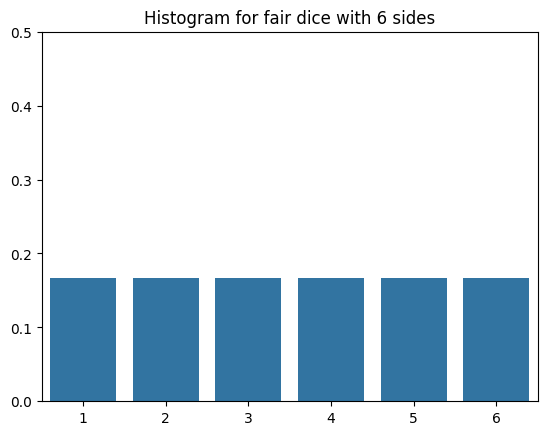

In [10]:
# Compute same probabilities for every side
probs_fair_dice = np.array([1/n_sides]*n_sides)

# Plot probabilities
fair_dice_sides = sns.barplot(x=dice, y=probs_fair_dice)
fair_dice_sides.set(title=f"Histogram for fair dice with {n_sides} sides")
fair_dice_sides.set_ylim(0,0.5)
plt.show()

Now get the probabilities by using the `load_dice` function. Try changing the loaded side!

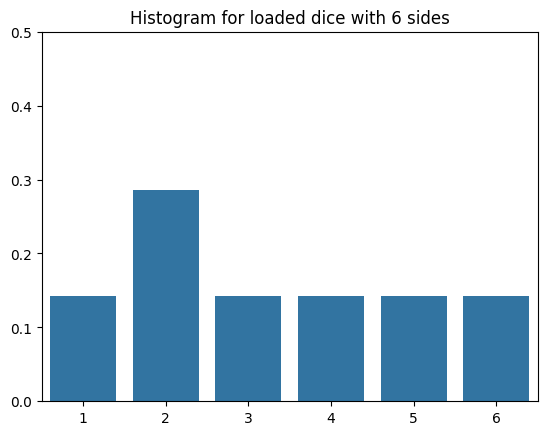

In [11]:
# Get probabilities if dice is loaded towards side 2
probs_loaded_dice = load_dice(n_sides, loaded_number=2)

# Plot probabilities
loaded_dice_sides = sns.barplot(x=dice, y=probs_loaded_dice)
loaded_dice_sides.set(title=f"Histogram for loaded dice with {n_sides} sides")
loaded_dice_sides.set_ylim(0,0.5)
plt.show()

Now, feed the `probs_loaded_dice` array into `np.random.choice` and see how this affect the metrics and plot:

mean of first_rolls: 3.28
variance of first_rolls: 2.79

mean of second_rolls: 3.29
variance of second_rolls: 2.77

mean of sum_of_rolls: 6.57
variance of sum_of_rolls: 5.52

covariance between first and second roll:
[[ 2.78652884 -0.01725386]
 [-0.01725386  2.76813841]]


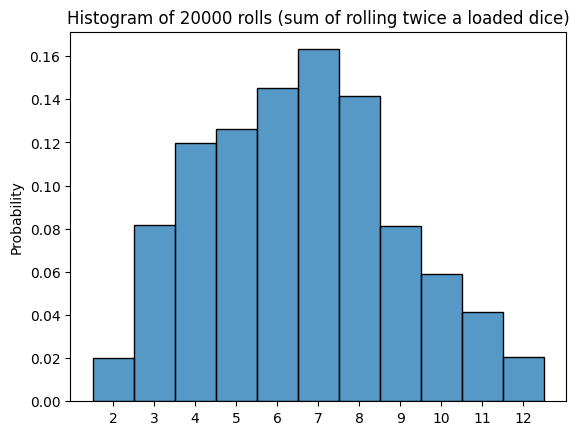

In [12]:
n_rolls = 20_000

# Notice that the p parameter is being set
first_rolls = np.array([np.random.choice(dice, p=probs_loaded_dice) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(dice, p=probs_loaded_dice) for _ in range(n_rolls)])

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
loaded_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
loaded_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (sum of rolling twice a loaded dice)")
loaded_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

Now the histogram is skewed towards some values since some sums are now more likely than others. Try changing the loaded side and see how the histogram changes!

Notice that covariance is still very close to zero since there is not any dependance between rolls of the dice.

## Dependant Rolls

To finish this lab you will now simulate the scenario in which the second roll depends on the result of the first one. Say that you are playing a variant of the game you have played so far and you only roll the dice a second time if the result of the first roll is greater or equal to 4.

Before doing the simulations reflect on what might happen in this scenario. Some behavior you will probably see:

- 1 is now a possible result since if you get a 1 in the first roll you don't roll again
- 1, 2 and 3 now have a greater chance of showing up
- 4 is now not a possible result since you need to roll again if you get a 4 in the first roll

To achieve this behaviour you can use the [np.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function, which given a condition can be used to zero-out the elements that don't meet its criteria:

In [13]:
arr = np.array([1, -2, 3, -4, 5])

# Replace negative numbers with 0
new_arr = np.where(arr < 0, 0, arr)
print(f"Array after replacing negatives: {new_arr}")

# Find indices of positive numbers
indices = np.where(arr > 0)
print(f"Indices of positive numbers: {indices}")

Array after replacing negatives: [1 0 3 0 5]
Indices of positive numbers: (array([0, 2, 4]),)


mean of first_rolls: 3.51
variance of first_rolls: 2.96

mean of second_rolls: 1.76
variance of second_rolls: 4.55

mean of sum_of_rolls: 5.26
variance of sum_of_rolls: 12.81

covariance between first and second roll:
[[2.95521806 2.65264608]
 [2.65264608 4.54544627]]


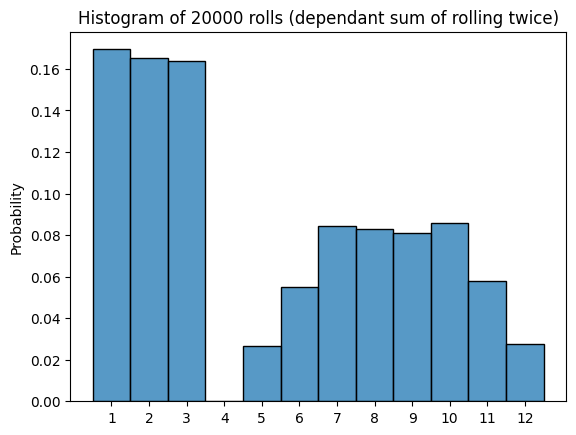

In [14]:
n_rolls = 20_000

first_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

second_rolls = np.array([np.random.choice(dice) for _ in range(n_rolls)])

# Preserve the result of the second throw only if the first roll was greater or equal to 4
second_rolls = np.where(first_rolls>=4, second_rolls, 0)

sum_of_rolls = first_rolls + second_rolls

print(f"mean of first_rolls: {np.mean(first_rolls):.2f}\nvariance of first_rolls: {np.var(first_rolls):.2f}\n")
print(f"mean of second_rolls: {np.mean(second_rolls):.2f}\nvariance of second_rolls: {np.var(second_rolls):.2f}\n")
print(f"mean of sum_of_rolls: {np.mean(sum_of_rolls):.2f}\nvariance of sum_of_rolls: {np.var(sum_of_rolls):.2f}\n")
print(f"covariance between first and second roll:\n{np.cov(first_rolls, second_rolls)}")

# Plot histogram
dependant_rolls_hist = sns.histplot(sum_of_rolls, stat = "probability", discrete=True)
dependant_rolls_hist.set(title=f"Histogram of {n_rolls} rolls (dependant sum of rolling twice)")
dependant_rolls_hist.set_xticks(range(min(sum_of_rolls),max(sum_of_rolls)+1))
plt.show()

Looks like all of the predictions of this new scenario indeed happened. Notice that the covariance now is nowhere near zero since there is a dependency between the first and the second roll!

**Now you have finished this ungraded lab, nice job!**